# EDA

## Import and Load data

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'/home/gaga/yannam/DrugLab/notebooks'

In [4]:
!cd ../data/mimiciii/1.4/ && ls

preprocessed  raw


In [5]:
!ls

bmi.ipynb  Drugs      Medication	     Medication-Trend  Prescription
Dataset    eda.ipynb  Medication-Regression  Others	       sql_queries


## Data Preprocessing

In [6]:
admissions = pd.read_csv('../data/mimiciii/1.4/raw/ADMISSIONS.csv.gz')

In [7]:
admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [8]:
patients = pd.read_csv('../data/mimiciii/1.4/raw/PATIENTS.csv.gz')

In [9]:
patients

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


In [10]:
patients['DOB'] = pd.to_datetime(patients['DOB']).dt.date

In [11]:
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME']).dt.date

In [12]:
admissions.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [13]:
patients.columns

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')

In [14]:
admissions = admissions.sort_values(['SUBJECT_ID', 'ADMITTIME']).groupby('SUBJECT_ID').nth(0).reset_index()

In [15]:
temp = pd.merge(admissions, patients, how='inner', on='SUBJECT_ID')

In [16]:
temp['ADMITTIME'], temp['DOB']

(0        2138-07-17
 1        2101-10-20
 2        2191-03-16
 3        2103-02-02
 4        2175-05-30
             ...    
 46515    2181-01-27
 46516    2184-12-24
 46517    2144-07-25
 46518    2147-02-08
 46519    2117-12-30
 Name: ADMITTIME, Length: 46520, dtype: object,
 0        2138-07-17
 1        2025-04-11
 2        2143-05-12
 3        2103-02-02
 4        2109-06-21
             ...    
 46515    2127-04-08
 46516    2137-04-07
 46517    2078-10-17
 46518    2058-05-29
 46519    2054-01-06
 Name: DOB, Length: 46520, dtype: object)

In [17]:
temp.apply(lambda r: round((r['ADMITTIME']-r['DOB']).days/365, 0), axis=1)

0         0.0
1        77.0
2        48.0
3         0.0
4        66.0
         ... 
46515    54.0
46516    48.0
46517    66.0
46518    89.0
46519    64.0
Length: 46520, dtype: float64

In [18]:
temp.apply(lambda r: round((r['ADMITTIME']-r['DOB']).days/365, 1), axis=1)

0         0.0
1        76.6
2        47.9
3         0.0
4        66.0
         ... 
46515    53.8
46516    47.7
46517    65.8
46518    88.8
46519    64.0
Length: 46520, dtype: float64

In [19]:
temp['AGE'] = temp.apply(lambda r: round((r['ADMITTIME']-r['DOB']).days/365, 0), axis=1)

In [20]:
temp = temp[temp['AGE']<100]

## Age

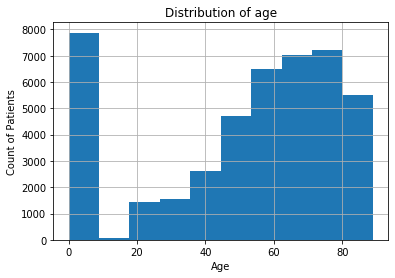

In [21]:
import matplotlib.pyplot as plt
temp['AGE'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')
plt.savefig('../plots/analysis/age.png')

In [22]:
admissions['SUBJECT_ID']

0            2
1            3
2            4
3            5
4            6
         ...  
46515    99985
46516    99991
46517    99992
46518    99995
46519    99999
Name: SUBJECT_ID, Length: 46520, dtype: int64

In [23]:
temp.columns

Index(['SUBJECT_ID', 'ROW_ID_x', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'AGE'],
      dtype='object')

## Gender

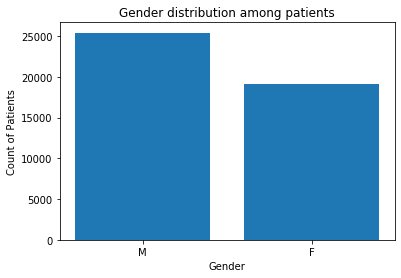

In [24]:
gender_dict = temp['GENDER'].value_counts().to_dict()
plt.bar(gender_dict.keys(), gender_dict.values())
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.title('Gender distribution among patients')
plt.savefig('../plots/analysis/gender.png')

## Ethinicity

In [28]:
ethnicity = temp['ETHNICITY'].value_counts().to_dict()

In [40]:
len(list(ethnicity.keys()))

41

[]

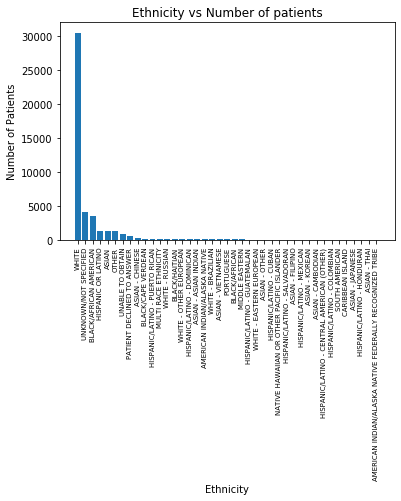

In [53]:
plt.bar(list(ethnicity.keys()), list(ethnicity.values()))
plt.xticks(fontsize=7, rotation=90)
plt.xlabel('Ethnicity')
plt.ylabel('Number of Patients')
plt.title('Ethnicity vs Number of patients')
plt.savefig('../plots/analysis/ethnicity.png')
plt.plot()

## Others

In [55]:
temp.columns

Index(['SUBJECT_ID', 'ROW_ID_x', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'AGE'],
      dtype='object')

In [58]:
temp

,SUBJECT_ID,ROW_ID_x,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE
0,2,1,163353,2138-07-17,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,0,1,1,M,2138-07-17,NaN,NaN,NaN,0,0.0
1,3,2,145834,2101-10-20,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,0,1,2,M,2025-04-11,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,77.0
2,4,3,185777,2191-03-16,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,0,1,3,F,2143-05-12,NaN,NaN,NaN,0,48.0
3,5,4,178980,2103-02-02,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,0,1,4,M,2103-02-02,NaN,NaN,NaN,0,0.0
4,6,5,107064,2175-05-30,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,0,1,5,F,2109-06-21,NaN,NaN,NaN,0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46515,99985,58972,176670,2181-01-27,2181-02-12 17:05:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,0,1,46516,M,2127-04-08,NaN,NaN,NaN,0,54.0
46516,99991,58973,151118,2184-12-24,2185-01-05 12:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,0,1,46517,M,2137-04-07,NaN,NaN,NaN,0,48.0
46517,99992,58974,197084,2144-07-25,2144-07-28 17:56:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,0,1,46518,F,2078-10-17,NaN,NaN,NaN,0,66.0
46518,99995,58975,137810,2147-02-08,2147-02-11 13:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,...,0,1,46519,F,2058-05-29,2147-09-29 00:00:00,NaN,2147-09-29 00:00:00,1,89.0


In [61]:
bmi_data = pd.read_csv('../data/mimiciii/1.4/preprocessed/bmi.csv').drop(columns=['Unnamed: 0'])

In [62]:
patient_data = temp
age = patient_data[['SUBJECT_ID', 'HADM_ID', 'AGE']]
gender = patient_data[['SUBJECT_ID', 'HADM_ID', 'GENDER']]

In [63]:
bmi_data.shape, age.shape, gender.shape

((18478, 6), (44529, 3), (44529, 3))

In [70]:
pd.merge(bmi_data, gender, how='inner', on=['HADM_ID', 'SUBJECT_ID'])

,HADM_ID,SUBJECT_ID,HEIGHT,WEIGHT,CHARTTIME,BMI,GENDER
0,100009,533,1.8300,117.700000,2162-05-17 16:37:00,35.145869,M
1,100012,60039,1.7800,92.500000,2177-03-14 12:43:00,29.194546,M
2,100016,68591,1.3700,50.600000,2188-05-24 16:07:00,26.959348,M
3,100017,16229,1.7272,83.699997,2103-03-11 09:04:00,28.056932,M
4,100018,58128,1.7800,123.500000,2176-08-30 15:07:00,38.978664,M
...,...,...,...,...,...,...,...
18473,199986,5887,1.5748,54.000000,2188-10-30 20:58:00,21.774237,F
18474,199988,25780,1.6256,78.900002,2169-02-08 17:51:00,29.857238,M
18475,199993,20785,1.6256,68.699997,2161-10-23 18:37:00,25.997365,M
18476,199995,19412,1.8288,78.000000,2137-12-20 19:01:00,23.321806,M


In [71]:
bmi_e = (20,25)
gender_e = 'M'
age_e = (50,60)

bmi_data = bmi_data[bmi_data['BMI']<=bmi_e[1]]
bmi_data = bmi_data[bmi_data['BMI']>=bmi_e[0]]

age = age[age['AGE']>=age_e[0]]
age = age[age['AGE']<=age_e[1]]

if gender_e=='M':
    gender = gender[gender['GENDER']=='M']
elif gender_e=='F':
    gender = gender[gender['GENDER']=='F']

final_data = pd.merge(age, pd.merge(bmi_data, gender, how='inner', on=['HADM_ID', 'SUBJECT_ID']), how='inner', on=['HADM_ID', 'SUBJECT_ID'])

final_data

,SUBJECT_ID,HADM_ID,AGE,HEIGHT,WEIGHT,CHARTTIME,BMI,GENDER
0,41,101757,57.0,1.8796,75.000000,2133-01-03 09:01:00,21.229042,M
1,79,181542,52.0,1.7780,77.199997,2175-09-26 02:34:00,24.420456,M
2,252,190159,55.0,1.8796,87.000000,2133-03-31 19:58:00,24.625688,M
3,457,166305,54.0,1.6510,61.000000,2146-01-31 12:23:00,22.378743,M
4,571,193189,57.0,1.7272,64.000000,2106-10-12 18:52:00,21.453330,M
...,...,...,...,...,...,...,...,...
459,98952,151098,58.0,1.8000,79.650000,2145-08-12 08:52:00,24.583333,M
460,98961,104381,58.0,1.7900,66.400000,2118-01-21 02:26:00,20.723448,M
461,99115,132152,51.0,1.7500,65.500000,2193-12-29 18:52:00,21.387755,M
462,99897,162913,54.0,1.7500,74.350000,2181-08-06 04:32:00,24.277551,M


In [72]:
final_data.describe()

,SUBJECT_ID,HADM_ID,AGE,HEIGHT,WEIGHT,BMI
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,38794.010776,152203.435345,55.178879,1.764246,71.902435,23.055128
std,30086.189141,29253.926478,3.147955,0.079403,7.725617,1.344897
min,41.000000,100817.000000,50.000000,1.550000,52.900000,20.030793
25%,13509.500000,128667.250000,52.000000,1.701800,65.987500,22.011312
50%,27884.500000,151283.500000,55.500000,1.758950,71.300002,23.367532
75%,65231.500000,178752.000000,58.000000,1.822200,77.199997,24.218798
max,99985.000000,199955.000000,60.000000,2.082800,99.650002,24.992482


In [76]:
k= ['None']
k = k if k is not None else ['bmi', 'gender', 'age', 'ethnicity', 'length_stay', 'mortality']

In [77]:
k

['None']

## Stratification

stratify/stratify.py [Class: Stratify Func: __init__] INFO : Started stratification
dataset/dataset.py [Class: Stratify Func: __init__] INFO : Started loading data from mimiciii dataset...
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loading dob_patient_bins data...
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loaded dob_patient_bins
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loading admissions data...
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loaded admissions
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loading labevents data...
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loaded labevents
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loading inputevents_mv data...
/home/gaga/yannam/DrugLab/src/preprocess/dataset.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

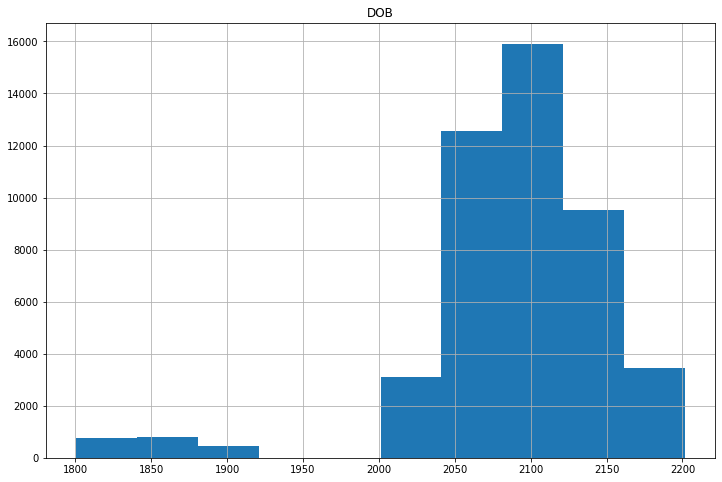

In [1]:
from preprocess.stratify import Stratify
s = Stratify('../data/mimiciii/1.4/')

In [2]:
s.stratified

,SUBJECT_ID,HADM_ID,AGE,HEIGHT,WEIGHT,CHARTTIME,BMI,GENDER,ETHNICITY
0,41,101757,57.0,1.8796,75.000000,2133-01-03 09:01:00,21.229042,M,WHITE
1,132,160192,56.0,1.6510,66.800003,2115-05-07 01:28:00,24.506559,F,WHITE
2,160,161672,50.0,1.7018,58.599998,2174-11-06 21:00:00,20.233945,F,WHITE
3,252,190159,55.0,1.8796,87.000000,2133-03-31 19:58:00,24.625688,M,WHITE
4,382,165617,56.0,1.6256,61.000000,2117-11-30 10:01:00,23.083542,F,WHITE
...,...,...,...,...,...,...,...,...,...
474,99002,116519,58.0,1.6000,60.200000,2196-02-03 12:03:00,23.515625,F,WHITE
475,99408,169240,54.0,1.6300,56.750000,2116-08-19 17:34:00,21.359479,F,WHITE
476,99691,140367,50.0,1.6650,61.100000,2139-09-03 09:25:00,22.040058,F,WHITE
477,99693,171735,50.0,1.6500,65.200000,2117-02-26 21:45:00,23.948577,F,WHITE


In [3]:
l = s.patient_presc['inputevents']['HADM_ID'].unique()
t = s.stratified
t[t['HADM_ID'].isin(l)]

,SUBJECT_ID,HADM_ID,AGE,HEIGHT,WEIGHT,CHARTTIME,BMI,GENDER,ETHNICITY
220,27177,198259,53.0,1.5700,54.000000,2146-08-10 18:14:00,21.907582,F,WHITE
223,27398,165585,51.0,1.8000,70.700000,2129-08-03 06:42:00,21.820988,M,WHITE
225,27594,137829,52.0,1.8017,80.300003,2183-08-03 17:02:00,24.737204,M,WHITE
226,27597,180160,60.0,1.7500,68.400000,2199-07-10 00:16:00,22.334694,M,WHITE
227,27610,199608,51.0,1.7800,74.700000,2119-09-13 09:56:00,23.576569,M,WHITE
...,...,...,...,...,...,...,...,...,...
474,99002,116519,58.0,1.6000,60.200000,2196-02-03 12:03:00,23.515625,F,WHITE
475,99408,169240,54.0,1.6300,56.750000,2116-08-19 17:34:00,21.359479,F,WHITE
476,99691,140367,50.0,1.6650,61.100000,2139-09-03 09:25:00,22.040058,F,WHITE
477,99693,171735,50.0,1.6500,65.200000,2117-02-26 21:45:00,23.948577,F,WHITE


In [4]:
t = s.patient_presc['inputevents']
l = s.stratified['HADM_ID'].unique()
t[t['HADM_ID'].isin(l)]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,LABEL,CATEGORY,PARAM_TYPE
416682,80030,100442,249621.0,2119-06-07 02:58:00,2119-06-07 12:55:00,225158,100.000001,ml,mL,01-Drips,NaCl 0.9%,Fluids/Intake,Solution
630158,80030,100442,249621.0,2119-06-07 02:58:00,2119-06-07 14:55:00,220949,99.999997,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
1504794,80030,100442,249621.0,2119-06-07 02:58:00,2119-06-07 12:55:00,225910,80.000006,mg,dose,01-Drips,Pantoprazole (Protonix),Medications,Solution
1949503,80030,100442,249621.0,2119-06-07 02:58:00,2119-06-07 14:55:00,225155,0.600000,mg,mg,01-Drips,Octreotide,Medications,Solution
701252,80030,100442,249621.0,2119-06-07 02:59:00,2119-06-07 03:00:00,226361,8200.000000,ml,mL,16-Pre Admission,Pre-Admission Intake,Fluids/Intake,Solution
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18567,32688,199743,232931.0,2117-06-27 02:57:00,2117-06-27 12:57:00,225166,40.000002,mEq,mEq,02-Fluids (Crystalloids),Potassium Chloride,Medications,Solution
1675695,32688,199743,232931.0,2117-06-27 02:57:00,2117-06-27 12:57:00,225823,999.999960,ml,mL,02-Fluids (Crystalloids),D5 1/2NS,Fluids/Intake,Solution
1050139,32688,199743,232931.0,2117-06-27 04:23:00,2117-06-27 04:24:00,226452,120.000000,ml,mL,14-Oral/Gastric Intake,PO Intake,Fluids/Intake,Solution
1050294,32688,199743,232931.0,2117-06-27 09:07:00,2117-06-27 09:08:00,226452,480.000000,ml,mL,14-Oral/Gastric Intake,PO Intake,Fluids/Intake,Solution


In [5]:
s.patient_presc['inputevents']

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,LABEL,CATEGORY,PARAM_TYPE
416682,80030,100442,249621.0,2119-06-07 02:58:00,2119-06-07 12:55:00,225158,100.000001,ml,mL,01-Drips,NaCl 0.9%,Fluids/Intake,Solution
630158,80030,100442,249621.0,2119-06-07 02:58:00,2119-06-07 14:55:00,220949,99.999997,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
1504794,80030,100442,249621.0,2119-06-07 02:58:00,2119-06-07 12:55:00,225910,80.000006,mg,dose,01-Drips,Pantoprazole (Protonix),Medications,Solution
1949503,80030,100442,249621.0,2119-06-07 02:58:00,2119-06-07 14:55:00,225155,0.600000,mg,mg,01-Drips,Octreotide,Medications,Solution
701252,80030,100442,249621.0,2119-06-07 02:59:00,2119-06-07 03:00:00,226361,8200.000000,ml,mL,16-Pre Admission,Pre-Admission Intake,Fluids/Intake,Solution
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18567,32688,199743,232931.0,2117-06-27 02:57:00,2117-06-27 12:57:00,225166,40.000002,mEq,mEq,02-Fluids (Crystalloids),Potassium Chloride,Medications,Solution
1675695,32688,199743,232931.0,2117-06-27 02:57:00,2117-06-27 12:57:00,225823,999.999960,ml,mL,02-Fluids (Crystalloids),D5 1/2NS,Fluids/Intake,Solution
1050139,32688,199743,232931.0,2117-06-27 04:23:00,2117-06-27 04:24:00,226452,120.000000,ml,mL,14-Oral/Gastric Intake,PO Intake,Fluids/Intake,Solution
1050294,32688,199743,232931.0,2117-06-27 09:07:00,2117-06-27 09:08:00,226452,480.000000,ml,mL,14-Oral/Gastric Intake,PO Intake,Fluids/Intake,Solution


In [6]:
t = s.patient_presc['inputevents'][s.patient_presc['inputevents']['HADM_ID']==100442]

In [7]:
t[t['LABEL']=='Dextrose 5%']

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,LABEL,CATEGORY,PARAM_TYPE
630158,80030,100442,249621.0,2119-06-07 02:58:00,2119-06-07 14:55:00,220949,99.999997,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
629910,80030,100442,249621.0,2119-06-07 03:02:00,2119-06-07 09:42:00,220949,1000.000000,ml,mL,02-Fluids (Crystalloids),Dextrose 5%,Fluids/Intake,Solution
630281,80030,100442,249621.0,2119-06-07 11:30:00,2119-06-07 12:00:00,220949,49.999998,ml,mL,02-Fluids (Crystalloids),Dextrose 5%,Fluids/Intake,Solution
630054,80030,100442,249621.0,2119-06-07 12:15:00,2119-06-07 12:16:00,220949,100.000000,ml,mL,08-Antibiotics (IV),Dextrose 5%,Fluids/Intake,Solution
630041,80030,100442,249621.0,2119-06-07 13:20:00,2119-06-07 13:21:00,220949,250.000000,ml,mL,08-Antibiotics (IV),Dextrose 5%,Fluids/Intake,Solution
630372,80030,100442,249621.0,2119-06-07 14:55:00,2119-06-08 02:52:00,220949,99.999997,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
630013,80030,100442,249621.0,2119-06-07 20:00:00,2119-06-07 20:01:00,220949,200.000000,ml,mL,08-Antibiotics (IV),Dextrose 5%,Fluids/Intake,Solution
630227,80030,100442,249621.0,2119-06-07 21:00:00,2119-06-07 21:01:00,220949,100.000000,ml,mL,08-Antibiotics (IV),Dextrose 5%,Fluids/Intake,Solution
630280,80030,100442,249621.0,2119-06-08 04:00:00,2119-06-08 04:01:00,220949,100.000000,ml,mL,08-Antibiotics (IV),Dextrose 5%,Fluids/Intake,Solution
630373,80030,100442,249621.0,2119-06-08 12:17:00,2119-06-08 12:18:00,220949,100.000000,ml,mL,08-Antibiotics (IV),Dextrose 5%,Fluids/Intake,Solution


In [8]:
s.lab_measurements['inputevents']

,SUBJECT_ID,HADM_ID,LABEL,VALUENUM,VALUEUOM,CHARTTIME
123752,27177,198259.0,"Calcium, Total",8.2,mg/dL,2146-08-11 07:04:00
126125,27597,180160.0,"Calcium, Total",7.1,mg/dL,2199-07-27 06:45:00
126126,27597,180160.0,"Calcium, Total",7.3,mg/dL,2199-07-28 05:50:00
126652,27594,137829.0,"Calcium, Total",7.9,mg/dL,2183-08-03 17:32:00
126653,27597,180160.0,"Calcium, Total",6.8,mg/dL,2199-07-06 22:05:00
...,...,...,...,...,...,...
7876277,91333,112508.0,Broad Casts,2.0,#/lpf,2176-05-06 17:41:00
7876302,51826,149231.0,WBC Casts,7.0,#/lpf,2182-07-04 22:19:00
7876329,91333,112508.0,WBC Casts,1.0,#/lpf,2176-04-20 13:33:00
7876540,32047,155347.0,RBC Casts,3.0,#/lpf,2159-06-26 09:37:00


In [9]:
s.med1[s.med1['SUBJECT_ID']==80030]

,HADM_ID,LABEL,SUBJECT_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE
0,100442,Albumin 25%,80030,249621.0,2119-06-07 21:08:00,2119-06-08 01:08:00,220862,399.999984,ml,mL,04-Fluids (Colloids),Blood Products/Colloids,Solution
1,100442,Ampicillin/Sulbactam (Unasyn),80030,243791.0,2119-07-06 09:58:00,2119-07-06 09:59:00,225843,1.000000,dose,dose,08-Antibiotics (IV),Antibiotics,Solution
2,100442,Azithromycin,80030,249621.0,2119-06-07 13:20:00,2119-06-07 13:21:00,225845,1.000000,dose,dose,08-Antibiotics (IV),Antibiotics,Solution
3,100442,Calcium Gluconate,80030,249621.0,2119-06-07 12:30:00,2119-06-07 13:30:00,221456,2.000000,grams,grams,02-Fluids (Crystalloids),Medications,Solution
4,100442,Ceftriaxone,80030,243791.0,2119-07-06 11:04:00,2119-07-06 11:05:00,225855,1.000000,dose,dose,08-Antibiotics (IV),Antibiotics,Solution
5,100442,Cryoprecipitate,80030,243791.0,2119-07-06 11:28:00,2119-07-06 12:28:00,225171,124.999998,ml,mL,07-Blood Products,Blood Products/Colloids,Solution
6,100442,D5 1/2NS,80030,243791.0,2119-07-05 12:04:00,2119-07-06 01:23:00,225823,998.800017,ml,mL,02-Fluids (Crystalloids),Fluids/Intake,Solution
7,100442,Dextrose 5%,80030,249621.0,2119-06-07 02:58:00,2119-06-07 14:55:00,220949,99.999997,ml,mL,01-Drips,Fluids/Intake,Solution
8,100442,Ensure (Full),80030,249621.0,2119-06-14 15:14:00,2119-06-14 15:15:00,225937,240.000000,ml,mL,15-Supplements,Nutrition - Enteral,Solution
9,100442,Fentanyl,80030,249621.0,2119-06-07 11:18:00,2119-06-07 11:19:00,221744,24.999999,mcg,mg,05-Med Bolus,Medications,Solution


In [10]:
s.med2[s.med2['SUBJECT_ID']==80030]

,HADM_ID,LABEL,SUBJECT_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE
0,100442,Albumin 25%,80030,243791.0,2119-07-06 17:11:00,2119-07-06 17:41:00,220862,49.999998,ml,mL,04-Fluids (Colloids),Blood Products/Colloids,Solution
1,100442,Azithromycin,80030,249621.0,2119-06-08 13:10:00,2119-06-08 13:11:00,225845,1.000000,dose,dose,08-Antibiotics (IV),Antibiotics,Solution
2,100442,Calcium Gluconate,80030,249621.0,2119-06-07 14:00:00,2119-06-07 15:00:00,221456,2.000000,grams,grams,02-Fluids (Crystalloids),Medications,Solution
3,100442,Ceftriaxone,80030,243791.0,2119-07-07 11:29:00,2119-07-07 11:30:00,225855,1.000000,dose,dose,08-Antibiotics (IV),Antibiotics,Solution
4,100442,Cryoprecipitate,80030,243791.0,2119-07-06 11:34:00,2119-07-06 12:34:00,225171,125.999994,ml,mL,07-Blood Products,Blood Products/Colloids,Solution
5,100442,D5 1/2NS,80030,243791.0,2119-07-06 01:23:00,2119-07-06 14:37:00,225823,992.500000,ml,mL,02-Fluids (Crystalloids),Fluids/Intake,Solution
6,100442,Dextrose 5%,80030,249621.0,2119-06-07 03:02:00,2119-06-07 09:42:00,220949,1000.000000,ml,mL,02-Fluids (Crystalloids),Fluids/Intake,Solution
7,100442,Fentanyl,80030,249621.0,2119-06-07 11:50:00,2119-06-07 11:51:00,221744,24.999999,mcg,mg,05-Med Bolus,Medications,Solution
8,100442,Fentanyl (Concentrate),80030,249621.0,2119-06-10 08:10:00,2119-06-10 11:20:00,225942,0.323000,mg,mg,01-Drips,Medications,Solution
9,100442,Free Water,80030,249621.0,2119-06-08 20:00:00,2119-06-08 20:01:00,225797,50.000000,ml,mL,14-Oral/Gastric Intake,Fluids/Intake,Solution


## Analysis

In [11]:
s.lab_measurements['inputevents']['LABEL'].value_counts()

Hematocrit                        3212
Hemoglobin                        3064
Red Blood Cells                   2856
Glucose                           2666
pO2                               1595
                                  ... 
Young Cells                          1
Carboxyhemoglobin                    1
WBC Count                            1
Leukocyte Alkaline Phosphatase       1
Rapamycin                            1
Name: LABEL, Length: 157, dtype: int64

In [89]:
s.med1['LABEL'].value_counts()

NaCl 0.9%                188
Dextrose 5%              171
PO Intake                163
Potassium Chloride       134
Solution                 122
                        ... 
Pentobarbital              1
NaCl 23.4%                 1
Erythromycin               1
Carafate (Sucralfate)      1
Two Cal HN (Full)          1
Name: LABEL, Length: 168, dtype: int64

In [82]:
labdf = s.lab_measurements['inputevents']
med1 = s.med1
med2 = s.med2
only_med1 = s.only_med1

In [83]:
prescdf = med1[med1['LABEL']=='Dextrose 5%']
prescdf1 = med2[med2['LABEL']=='Dextrose 5%']

# Select lab measurements of patients who have taken the drug
l = labdf[labdf['HADM_ID'].isin(prescdf['HADM_ID'])] 

In [84]:
prescdf['HADM_ID'].unique().shape, prescdf1['HADM_ID'].unique().shape

((171,), (155,))

In [85]:
k = l[l['LABEL']=='Hematocrit']

In [86]:
t = k.apply(lambda row : row['CHARTTIME'] > prescdf[prescdf['SUBJECT_ID']==row['SUBJECT_ID']]['ENDTIME'].iloc[0], axis=1)
k = k[t]
t = k.apply(lambda row : row['CHARTTIME'] > prescdf1[prescdf1['SUBJECT_ID']==row['SUBJECT_ID']]['STARTTIME'].iloc[0]  if row['SUBJECT_ID'] in prescdf1['SUBJECT_ID'] else True, axis=1)
k = k[t]

In [87]:
k

,SUBJECT_ID,HADM_ID,LABEL,VALUENUM,VALUEUOM,CHARTTIME
2325696,27597,180160.0,Hematocrit,28.5,%,2199-07-26 15:15:00
2325697,27597,180160.0,Hematocrit,25.1,%,2199-07-27 06:45:00
2325698,27597,180160.0,Hematocrit,26.3,%,2199-07-28 05:50:00
2327155,27597,180160.0,Hematocrit,22.8,%,2199-07-08 03:02:00
2327156,27597,180160.0,Hematocrit,22.6,%,2199-07-08 07:13:00
...,...,...,...,...,...,...
2608068,98952,151098.0,Hematocrit,32.9,%,2145-08-16 17:50:00
2608069,98952,151098.0,Hematocrit,30.8,%,2145-08-17 03:30:00
2608070,98952,151098.0,Hematocrit,28.8,%,2145-08-18 02:45:00
2608071,98952,151098.0,Hematocrit,30.2,%,2145-08-19 03:31:00


In [ ]:
k

In [95]:
import pickle
file = open('../data/mimiciii/1.4/preprocessed/stratified_mimiciii_dataset.obj', 'wb')
pickle.dump(s, file)
file.close()

In [1]:
import pickle
file = open('../data/mimiciii/1.4/preprocessed/stratified_mimiciii_(1, 2)_(1.0, 100.0)_F_(40, 50)_WHITE.obj', 'rb')
s = pickle.load(file)
file.close()


In [7]:
s.lab_measurements['inputevents'].tail()

,SUBJECT_ID,HADM_ID,LABEL,VALUENUM,VALUEUOM,CHARTTIME
7875923,48422,134537.0,Eosinophils,6.0,%,2116-05-28 08:02:00
7876062,62741,191275.0,Cancer Antigen 27.29,653.0,U/mL,2132-09-14 21:14:00
7876312,80342,160825.0,WBC Casts,11.0,#/lpf,2153-08-17 02:53:00
7876320,85457,125594.0,WBC Casts,3.0,#/lpf,2196-11-11 20:19:00
7876558,95673,190860.0,"Tissue Transglutaminase Ab, IgA",61.0,units,2186-06-19 03:55:00


In [2]:
import pandas as pd
import datetime
def labpairing(medname, prescdf, labdf, labname, med1=None, med2=None, window=(1,72), type='inputevents'):
    '''
    Generating Lab Test<>Meds Pairings. Pairs the drug input with each lab test

    Parameters:
    drugname (String): Drug Name
    prescdf (DataFrame): Dataframe containing the prescription data
    labdf (DataFrame): Dataframe containing the lab measurement data
    labname (DataFrame): Lab Test Name
    Returns:
    DataFrame: Contains all the rows of values and times for that particular drug lab apir
    '''

    if type=='inputevents':
        
        # Select patients who have taken the drug
        prescdf = None
        labdf = labdf['inputevents']
        if med1 is not None and med2 is not None:
            prescdf1 = med1[med1['LABEL']==medname]
            prescdf2 = med2[med2['LABEL']==medname]
            
            # Select lab measurements of patients who have taken the drug
            l = labdf[labdf['HADM_ID'].isin(prescdf1['HADM_ID'])]
            k = l[l['LABEL']==labname]

            t = k.apply(lambda row : row['CHARTTIME'] > prescdf1[prescdf1['SUBJECT_ID']==row['SUBJECT_ID']]['ENDTIME'].iloc[0], axis=1)
            k = k[t]
            t = k.apply(lambda row : row['CHARTTIME'] > prescdf2[prescdf2['SUBJECT_ID']==row['SUBJECT_ID']]['STARTTIME'].iloc[0]  if row['SUBJECT_ID'] in prescdf2['SUBJECT_ID'] else True, axis=1)
            k = k[t]

            labdf = k
            prescdf = prescdf1       

            print('Lab: ', labdf)
            print('Presc: ', prescdf)    

        else:
            prescdf = prescdf[prescdf['LABEL']==medname]
            prescdf = prescdf.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

            # Select lab measurements of patients who have taken the drug
            labdf = labdf[labdf['HADM_ID'].isin(prescdf['HADM_ID'])]

        # Selects the lab measurement entered
        drug_lab_specific = labdf[labdf['LABEL']==labname]
        mergeddf = pd.merge(drug_lab_specific, prescdf, on=['HADM_ID','SUBJECT_ID'])

        # Get time from prescription and choose before and after lab measurements (within k days)
        mergeddf['timeFromPrescription'] = mergeddf['CHARTTIME'] - mergeddf['STARTTIME']
        mergeddf = mergeddf[(
                (
                    mergeddf['timeFromPrescription']<datetime.timedelta(hours=(-1*window[0]))
                ) & (
                    mergeddf['timeFromPrescription']>datetime.timedelta(hours=(-1*window[1]))
                )
            ) | (
                (
                    mergeddf['timeFromPrescription']>datetime.timedelta(hours=window[0])
                ) & (
                    mergeddf['timeFromPrescription']<datetime.timedelta(hours=window[1])
                )
            )]
        posmergeddf = mergeddf.loc[mergeddf.timeFromPrescription > datetime.timedelta(hours=0)]
        negmergeddf = mergeddf.loc[mergeddf.timeFromPrescription < datetime.timedelta(hours=0)]
        
        # Only keep values for which we have both before and after
        posmergeddf = posmergeddf[posmergeddf['HADM_ID'].isin(negmergeddf['HADM_ID'])]
        negmergeddf = negmergeddf[negmergeddf['HADM_ID'].isin(posmergeddf['HADM_ID'])]
        drug_lab = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])

        # Choose admissions which have more than one lab test reading
        before = negmergeddf
        bool_before = before.groupby('SUBJECT_ID').count()>1
        index_before = bool_before[bool_before['HADM_ID']==True].index
        before = before[before['SUBJECT_ID'].isin(index_before)]
        negmergeddf = negmergeddf.loc[negmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmax()]

        after = posmergeddf
        bool_after = after.groupby('SUBJECT_ID').count()>1
        index_after = bool_after[bool_after['HADM_ID']==True].index
        after = after[after['SUBJECT_ID'].isin(index_after)]
        posmergeddf = posmergeddf.loc[posmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmin()]

        before = before[before['HADM_ID'].isin(after['HADM_ID'])]
        after = after[after['HADM_ID'].isin(before['HADM_ID'])]

        finaldf = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])
        
        return finaldf, before, after
    
    elif type=='prescriptions':

        # Select patients who have taken the drug
        prescdf = prescdf[prescdf['DRUG']==medname]
        prescdf = prescdf.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

        # Select lab measurements of patients who have taken the drug
        labdf = labdf[labdf['HADM_ID'].isin(prescdf['HADM_ID'])]

        # Selects the lab measurement entered
        drug_lab_specific = labdf[labdf['LABEL']==labname]
        mergeddf = pd.merge(drug_lab_specific, prescdf, on=['HADM_ID','SUBJECT_ID'])

        # Get time from prescription and choose before and after lab measurements (within 24hrs=1day)
        mergeddf['timeFromPrescription'] = mergeddf['CHARTTIME'] - mergeddf['STARTDATE']
        mergeddf = mergeddf[(
                (
                    mergeddf['timeFromPrescription']<datetime.timedelta(hours=(-1*window[0]))
                ) & (
                    mergeddf['timeFromPrescription']>datetime.timedelta(hours=(-1*window[1]))
                )
            ) | (
                (
                    mergeddf['timeFromPrescription']>datetime.timedelta(hours=window[0])
                ) & (
                    mergeddf['timeFromPrescription']<datetime.timedelta(hours=window[1])
                )
            )]
        posmergeddf = mergeddf.loc[mergeddf.timeFromPrescription > datetime.timedelta(hours=12)]
        negmergeddf = mergeddf.loc[mergeddf.timeFromPrescription < datetime.timedelta(hours=-12)]
        
        # Only keep values for which we have both before and after
        posmergeddf = posmergeddf[posmergeddf['HADM_ID'].isin(negmergeddf['HADM_ID'])]
        negmergeddf = negmergeddf[negmergeddf['HADM_ID'].isin(posmergeddf['HADM_ID'])]
        df = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])

        # Choose admissions which have more than one lab test reading
        before = negmergeddf
        bool_before = before.groupby('SUBJECT_ID').count()>1
        index_before = bool_before[bool_before['HADM_ID']==True].index
        before = before[before['SUBJECT_ID'].isin(index_before)]
        negmergeddf = negmergeddf.loc[negmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmax()]

        after = posmergeddf
        bool_after = after.groupby('SUBJECT_ID').count()>1
        index_after = bool_after[bool_after['HADM_ID']==True].index
        after = after[after['SUBJECT_ID'].isin(index_after)]
        posmergeddf = posmergeddf.loc[posmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmin()]

        before = before[before['HADM_ID'].isin(after['HADM_ID'])]
        after = after[after['HADM_ID'].isin(before['HADM_ID'])]

        finaldf = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])
        return finaldf, before, after

In [13]:
from analysis.analysis import Analysis

drug_lab, before, after = labpairing('Dextrose 5%', s.patient_presc, s.lab_measurements, 'Hematocrit', med1 = s.med1, med2 = s.med2)

Lab:           SUBJECT_ID   HADM_ID       LABEL  VALUENUM VALUEUOM  \
2325696       27597  180160.0  Hematocrit      28.5        %   
2325697       27597  180160.0  Hematocrit      25.1        %   
2325698       27597  180160.0  Hematocrit      26.3        %   
2327155       27597  180160.0  Hematocrit      22.8        %   
2327156       27597  180160.0  Hematocrit      22.6        %   
...             ...       ...         ...       ...      ...   
2608068       98952  151098.0  Hematocrit      32.9        %   
2608069       98952  151098.0  Hematocrit      30.8        %   
2608070       98952  151098.0  Hematocrit      28.8        %   
2608071       98952  151098.0  Hematocrit      30.2        %   
2608194       98952  151098.0  Hematocrit      27.7        %   

                  CHARTTIME  
2325696 2199-07-26 15:15:00  
2325697 2199-07-27 06:45:00  
2325698 2199-07-28 05:50:00  
2327155 2199-07-08 03:02:00  
2327156 2199-07-08 07:13:00  
...                     ...  
2608068 2145-08